In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [20]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)
train = data.iloc[:, 1:2].values

In [31]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [21]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [32]:
train_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [28]:
X_train = []
y_train = []

for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [30]:
print(X_train)

[[[0.6202352 ]
  [0.62226277]
  [0.64436334]
  ...
  [0.79622871]
  [0.81062449]
  [0.74371452]]

 [[0.62226277]
  [0.64436334]
  [0.61719384]
  ...
  [0.81062449]
  [0.74371452]
  [0.77007299]]

 [[0.64436334]
  [0.61719384]
  [0.61820762]
  ...
  [0.74371452]
  [0.77007299]
  [0.73641525]]

 ...

 [[0.19870235]
  [0.21796431]
  [0.21553122]
  ...
  [0.14963504]
  [0.14801298]
  [0.15815085]]

 [[0.21796431]
  [0.21553122]
  [0.20600162]
  ...
  [0.14801298]
  [0.15815085]
  [0.16504461]]

 [[0.21553122]
  [0.20600162]
  [0.21654501]
  ...
  [0.15815085]
  [0.16504461]
  [0.15896188]]]


In [35]:
X_train.shape[1]

60

In [36]:
model=Sequential()
# return_sequences=true ensures that the second LSTM laters has a 3-dimensional sequence input when stacking LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
# helps with overfitting
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
62/62 [==============================] - 8s 53ms/step - loss: 0.0080
Epoch 2/100
62/62 [==============================] - 3s 49ms/step - loss: 0.0026
Epoch 3/100
62/62 [==============================] - 3s 50ms/step - loss: 0.0023
Epoch 4/100
62/62 [==============================] - 3s 55ms/step - loss: 0.0023
Epoch 5/100
62/62 [==============================] - 3s 54ms/step - loss: 0.0022
Epoch 6/100
62/62 [==============================] - 3s 55ms/step - loss: 0.0018
Epoch 7/100
62/62 [==============================] - 3s 56ms/step - loss: 0.0020
Epoch 8/100
62/62 [==============================] - 3s 53ms/step - loss: 0.0018
Epoch 9/100
62/62 [==============================] - 3s 53ms/step - loss: 0.0016
Epoch 10/100
62/62 [==============================] - 3s 54ms/step - loss: 0.0017
Epoch 11/100
62/62 [==============================] - 3s 54ms/step - loss: 0.0016
Epoch 12/100
62/62 [==============================] - 3s 55ms/step - loss: 0.0018
Epoch 13/100
62/62 [=====

In [38]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
data_test = pd.read_csv(url)
real_stock_price = data_test.iloc[:, 1:2].values

In [61]:
data_full = pd.concat((data["Open"], data_test["Open"]), axis=0)
inputs = data_full[len(data_full) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

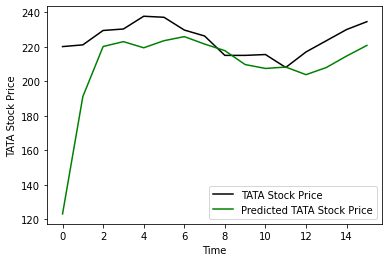

In [62]:
plt.plot(real_stock_price, color='black', label='TATA Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted TATA Stock Price')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()